In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import json
import sys
sys.path.append('..')
from constants import PALETTE, CLASS2IND
from utils import get_sorted_files_by_type

In [6]:
image_root = '../../../train/DCM'
json_path = get_sorted_files_by_type(os.path.dirname(image_root), 'json')
idx = 0

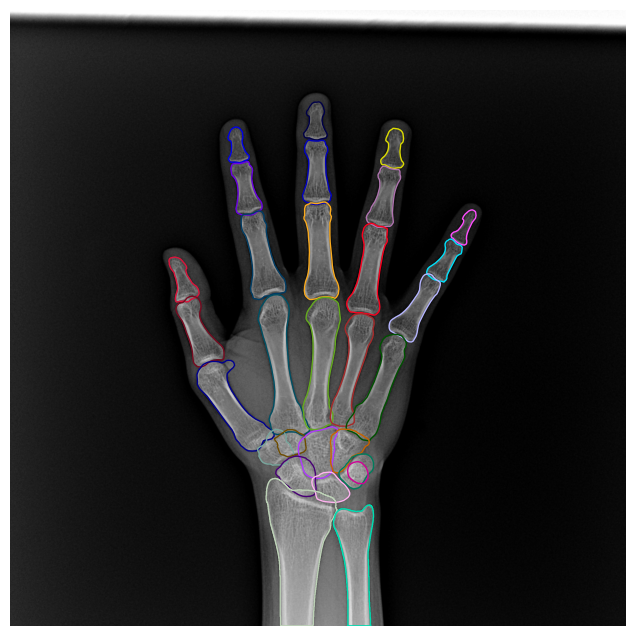

In [9]:
json_data = None
with open(os.path.join(json_path[idx]), 'r') as f:
    json_data = json.load(f)

image_name = json_data['filename'].split('.')[0]+'.png'
id = json_path[idx][json_path[idx].find('ID'):].split('/')[0]

image = Image.open(os.path.join(image_root, id, image_name))

fig, ax = plt.subplots(1, 1, figsize=[8,8])
ax.imshow(image, cmap='grey')
ax.axis('off')

c=0
for annot in json_data['annotations']:
    c = CLASS2IND[annot['label']]
    ax.add_patch(patches.Polygon(annot['points'], fill=False, edgecolor=f'#{PALETTE[c][0]:02x}{PALETTE[c][1]:02x}{PALETTE[c][2]:02x}')) # 02x: 2글자 채워서 16진수

plt.show()
idx += 1